In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

## Important modules from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [49]:
df = pd.read_csv("heart.csv")
df.shape

(303, 14)

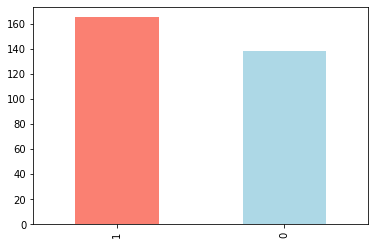

In [50]:
df["target"].value_counts().plot(kind = 'bar', color = ["salmon", "lightblue"]);

In [51]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Comparison between the heart disease frequency and patient's gender

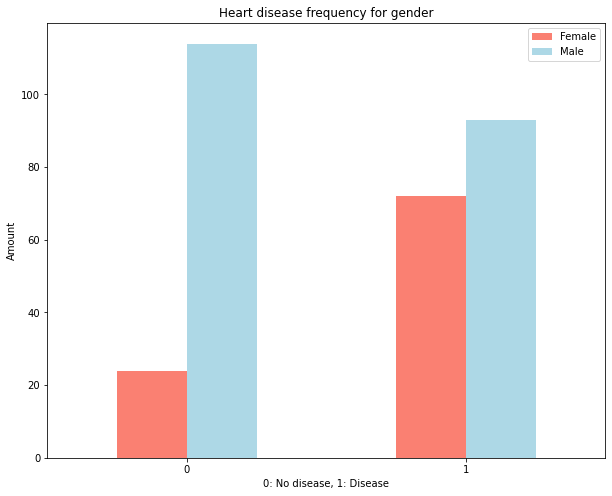

In [52]:
pd.crosstab(df.target, df.sex).plot(kind = 'bar', figsize = (10,8), color = ["salmon", "lightblue"]);
plt.title("Heart disease frequency for gender")
plt.xlabel("0: No disease, 1: Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation = 0);

### Heart disease frequency per patient's cholestorol level and max heart rate

In [53]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

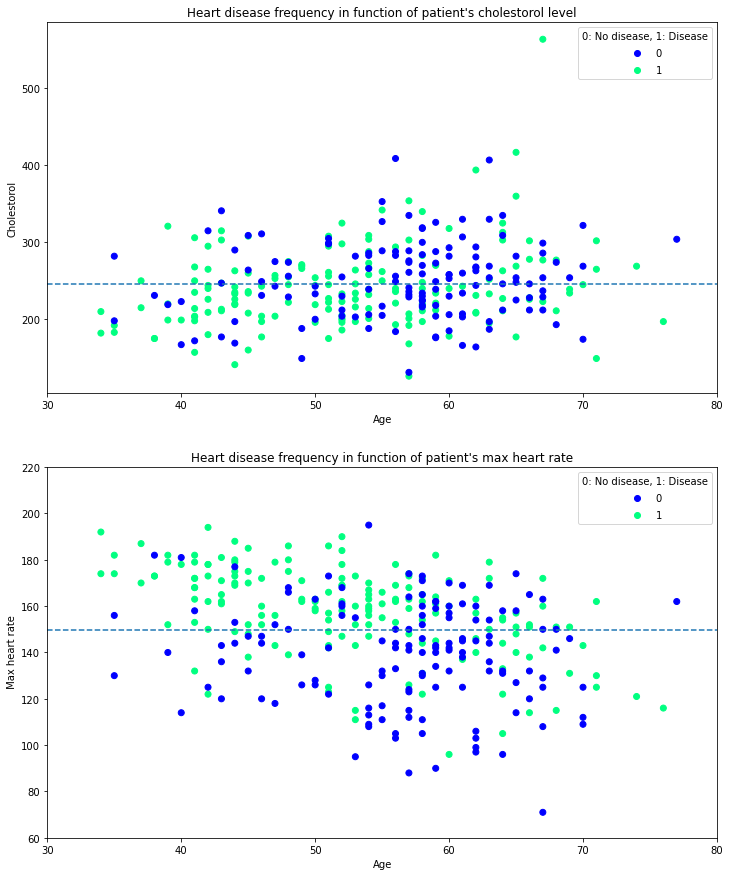

In [54]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(12,15))

scatter = ax0.scatter(x=df['age'], y=df['chol'], c=df['target'], cmap='winter');
ax0.set(title='Heart disease frequency in function of patient\'s cholestorol level', xlabel="Age", ylabel="Cholestorol");
ax0.legend(*scatter.legend_elements(), title="0: No disease, 1: Disease");
ax0.set_xlim([30,80])
ax0.axhline(y=df["chol"].mean(), linestyle="--");

scatter = ax1.scatter(x=df['age'], y=df["thalach"], c=df["target"], cmap='winter');
ax1.set(title='Heart disease frequency in function of patient\'s max heart rate', xlabel="Age", ylabel=" Max heart rate");
ax1.set_xlim([30,80])
ax1.set_ylim([60,220])
ax1.legend(*scatter.legend_elements(), title="0: No disease, 1: Disease");
ax1.axhline(y=df["thalach"].mean(), linestyle='--');

### Heart disease frequency per patient's chest pain type

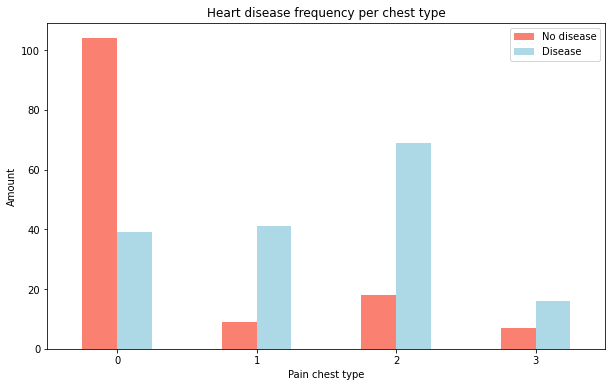

In [55]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color = ["salmon", "lightblue"]);
plt.title("Heart disease frequency per chest type")
plt.xlabel("Pain chest type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

### Correlation matrix

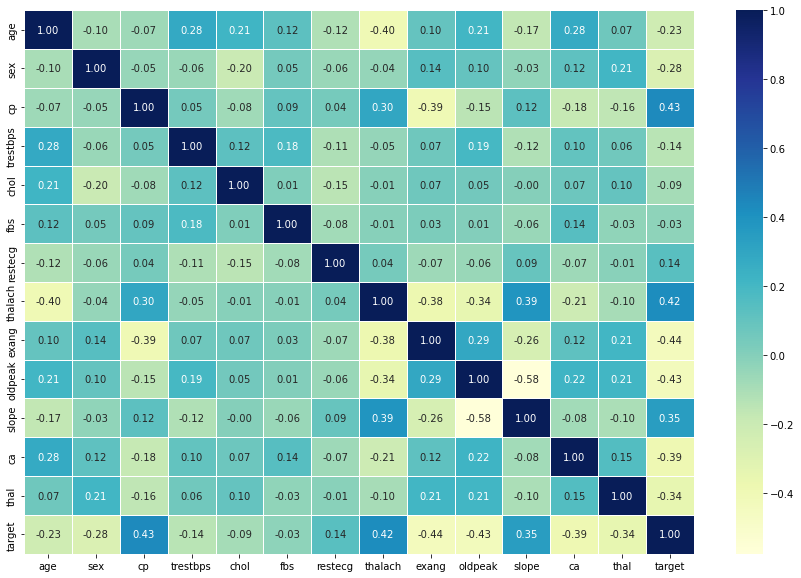

In [56]:
corr_matrix = df.corr()
fix, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths= 0.5, fmt = ".2f", cmap = "YlGnBu");

In [57]:
X = df.drop("target", axis = 1)
y = df.target


In [58]:
X = df.drop("target", axis = 1)
y = df.target


In [59]:
np.random.seed(42) # So we can reproduce our results

# Split the data into a train and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [60]:
models = {"Logistic Regression": LogisticRegression(), 
          "KNN": KNeighborsClassifier(), 
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    This function fits and evaluates given machine learning models: 
    models: a dictionary with the instantiated models
    X_train: training data (without labels)
    X_test: testing data (without labels)
    y_train: training labels
    y_test: testing labels
    """
    np.random.seed(42)
    # Creating an empty dictionary to fill
    model_scores = {} 
    
    #Looping through all the models, fit them and evaluate them
    for name, model in models.items(): 
        model.fit(X_train, y_train)
    # Appending each model's score to model_score    
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [61]:
model_scores = fit_and_score(models = models, 
                             X_train = X_train, 
                             X_test = X_test, 
                             y_train = y_train, 
                             y_test = y_test)
model_scores

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison

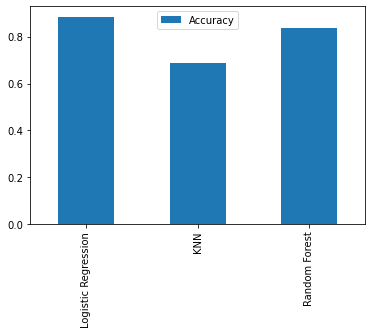

In [62]:
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.T.plot.bar();

### Hyperparameter Tuning

Maximum KNN score on the test data: 75.41%


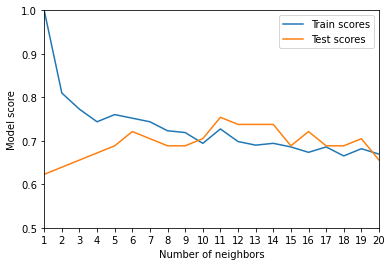

In [63]:
training_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Update the scores lists
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

plt.plot(neighbors, training_scores, label='Train scores')
plt.plot(neighbors, test_scores, label='Test scores')
plt.ylim([0.5, 1])
plt.xlim([1,20])
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Besides the successful Hyperparameter tuning on the KNN model, it didn't quite reach the other models accuracy, so we're going to discard KNN for now.

### Hyperparameter tuning with RandomizedSearchCV

Having KNN model discarded, we'll now tune:

LogisticRegression()

RandomForestClassifier()

In [64]:
## Creating a Hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20), 
                "solver": ["liblinear"]}
## Creating a Hyperparameter grid for RandomForestClassifier
# We'll use arange because it's highly recommended to use continuous distributions for continuous parameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
           "max_depth": [None, 3, 5, 10], 
           "min_samples_split": np.arange(2, 20, 2), 
           "min_samples_leaf": np.arange(1, 20, 2)}

### Tuning LogisticRegression

In [65]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions = log_reg_grid, 
                                cv = 5, 
                                n_iter = 20, 
                                verbose = True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [66]:
print(f'The best parameters in our grid are: {rs_log_reg.best_params_}')
print(f'Model\'s score: {rs_log_reg.score(X_test, y_test)*100:.2f}%')

The best parameters in our grid are: {'solver': 'liblinear', 'C': 0.23357214690901212}
Model's score: 88.52%


### Tuning RandomForestClassifier

In [71]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                                param_distributions = rf_grid, 
                                cv = 5, 
                                n_iter = 20, 
                                verbose = True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [69]:
print(f'The best parameters in our grid are: {rs_rf.best_params_}')
print(f'Model\'s score: {rs_rf.score(X_test, y_test)*100:.2f}%')

The best parameters in our grid are: {'n_estimators': 210, 'min_samples_split': 4, 'min_samples_leaf': 19, 'max_depth': 3}
Model's score: 86.89%


### Hyperparameter tuning with GridSearchCV

In [70]:
log_reg_grid = {"C": np.logspace(-4, 4, 30), 
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(), 
                                param_grid = log_reg_grid, 
                                cv = 5, 
                                verbose = True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
print(f'The best parameters in our grid are: {gs_log_reg.best_params_}')
print(f'Model\'s score: {gs_log_reg.score(X_test, y_test)*100:.2f}%')

### Evaluating the tuned classifier, beyond accuracy

### ROC curve

In [ ]:
y_preds = gs_log_reg.predict(X_test)

plot_roc_curve(gs_log_reg, X_test, y_test);

### Classification report

In [ ]:
print(classification_report(y_test, y_preds))

### Cross-validated accuracy, precision, recall, f1 score

In [74]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')
# Cross-validated accuracy
cv_accuracy = (cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')).mean()

# Cross-validated precision
cv_precision = (cross_val_score(clf, X, y, cv = 5, scoring = 'precision')).mean()

# Cross- validated recall
cv_recall = (cross_val_score(clf, X, y, cv = 5, scoring = 'recall')).mean()

# Cross-validated f1 score
cv_f1 = (cross_val_score(clf, X, y, cv = 5, scoring = 'f1')).mean()

cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy, "Precision": cv_precision, "Recall": cv_recall, "f1": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title = 'Cross validated classification metrics', legend = False);

### Saving the model

In [73]:
model = LogisticRegression()
model.fit
# save the model to disk
filename = 'classification_model'
pickle.dump(model, open(filename, 'wb'))